In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import spacy
from spacy.lang.en import stop_words
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',30)

In [337]:
df = pd.read_csv('clients_emails_filterd_new.csv')

In [338]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [339]:
df.drop('level_0',axis=1,inplace=True)

In [340]:
df

,cli_name,Subject,From,To,Text
0,Giza Systems,RE Company Form 20 Adding Richard and Ehab Th...,Ahmed Hany,Salim salim,Adding Richard and Ehab
1,Giza Systems,RE Rejection of TCC,Ahmed Hany,Nanyonjo Jacinta,Dear Rita Kindly find attached
2,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Mwangi This is fine with us
3,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Carolyn Good evening Thank you for reachi...
4,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Mwangi We spoke when Phoebe requested the...
...,...,...,...,...,...
104,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...
105,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...
106,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...
107,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...


In [341]:
df.dtypes

cli_name    object
Subject     object
From        object
To          object
Text        object
dtype: object

In [343]:
df.dropna(inplace=True)

## Handling Null Values

In [344]:
null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
    column name  Total missing  Percent missing
0     cli_name              0              0.0
1      Subject              0              0.0
2         From              0              0.0
3           To              0              0.0
4         Text              0              0.0


## Preprocessing

In [345]:
names1 = [i.lower() for i in list(set(df['From']))]
names2 = [i.lower() for i in list(set(df['To']))]
# print(names1)
# print(names2)
complete_names = names1.extend(names2)
short_names = []
for name in names1:
    tok = name.split()
    for i in tok:
        if len(i)>1:
            short_names.append(i)
for name in names2:
    tok = name.split()
    for i in tok:
        if len(i)>1:
            short_names.append(i)

# names1 = set(names1.extend(short_names))
short_names = list(set(short_names))
print(short_names,len(short_names))

['chip', 'salim', 'martin', 'nanyonjo', 'geoffrey', 'timothy', 'john', 'mgichangi', 'chris', 'gwambua', 'carolyn', 'njuguna', 'hany', 'henry', 'njange', 'jacinta', 'staff', 'ahmed', 'charlotte', 'tmwangi', 'ernest', 'mercy', 'michael', 'clifford', 'peter', 'shiraz', 'rehmanji'] 27


In [368]:
nlp = spacy.load('en_core_web_sm')
def preprocessed_emails(text):
    doc = nlp(text)
    processed_text = [token.lemma_.lower() for token in doc if not token.is_stop if not token.is_punct if not token.is_digit if not token.is_bracket if not token.is_currency if not token.is_space]
    filtered =  ' '.join(processed_text)
    words = filtered.split()
    preprocessed_text = [word for word in words if not word in ['http','https','www','com','org','mailto','regards','nan','Regards','Rgds','imlu','email','attachment','ea','e','bdo','kariuki','7C','7c','cnjange','peter','richard','rita','mwangi','carolyn','njange','ehab','dear','good','evening','afternoon','morning','ke','3d','mm','mw']]
    preprocessed_text_filter_names = [word for word in preprocessed_text if not word in short_names]
    return ' '.join(preprocessed_text_filter_names)

In [369]:
df['preprocessed_Text'] =  df.Text.apply(preprocessed_emails)

In [370]:
df

,cli_name,Subject,From,To,Text,preprocessed_Text,description_lengths,score,compound,Sentiment
0,Giza Systems,RE Company Form 20 Adding Richard and Ehab Th...,Ahmed Hany,Salim salim,Adding Richard and Ehab,add,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,Giza Systems,RE Rejection of TCC,Ahmed Hany,Nanyonjo Jacinta,Dear Rita Kindly find attached,kindly find attach,3,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.4939,Satisfied
2,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Mwangi This is fine with us,fine,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2023,Satisfied
3,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Carolyn Good evening Thank you for reachi...,thank reach propose meeting tomorrow 00am disc...,18,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.6249,Very Satisfied
4,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Mwangi We spoke when Phoebe requested the...,speak phoebe request additional information pr...,24,"{'neg': 0.068, 'neu': 0.533, 'pos': 0.399, 'co...",0.8807,Very Satisfied
...,...,...,...,...,...,...,...,...,...,...
104,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...,hope find provide certify copy record list pro...,10,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6808,Very Satisfied
105,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...,hope find provide certify copy record list pro...,10,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6808,Very Satisfied
106,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...,hope find provide certify copy record list pro...,10,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6808,Very Satisfied
107,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...,hope find provide certify copy record list pro...,10,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6808,Very Satisfied


## Creating Vocabulary

In [371]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['preprocessed_Text'].apply(tokenizer.tokenize)
words_descriptions.head()

0                                                [add]
1                               [kindly, find, attach]
2                                               [fine]
3    [thank, reach, propose, meeting, tomorrow, 00a...
4    [speak, phoebe, request, additional, informati...
Name: preprocessed_Text, dtype: object

In [372]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

1785 words total, with a vocabulary size of 610


##  Checking most common words

In [373]:
from collections import Counter
count_all_words = Counter(all_words)
count_word = count_all_words.most_common(10)

In [374]:
word =[]
count=[]
for item in count_word:
    word.append(item[0])
    count.append(item[1])

## word Frequency visualization for top 10

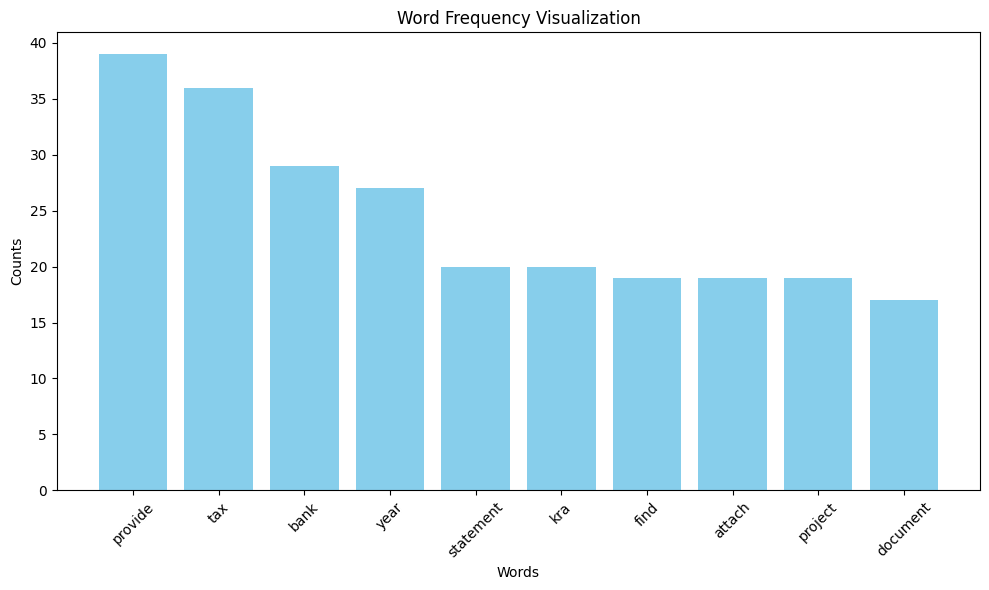

In [375]:
plt.figure(figsize=(10, 6))
plt.bar(word, count, color='skyblue')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Word Frequency Visualization')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [376]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [377]:
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))
    return str(score)

In [378]:
df['score'] = df['preprocessed_Text'].apply(lambda review: analyser.polarity_scores(review))
df.head()

,cli_name,Subject,From,To,Text,preprocessed_Text,description_lengths,score,compound,Sentiment
0,Giza Systems,RE Company Form 20 Adding Richard and Ehab Th...,Ahmed Hany,Salim salim,Adding Richard and Ehab,add,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,Giza Systems,RE Rejection of TCC,Ahmed Hany,Nanyonjo Jacinta,Dear Rita Kindly find attached,kindly find attach,3,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.4939,Satisfied
2,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Mwangi This is fine with us,fine,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2023,Satisfied
3,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Carolyn Good evening Thank you for reachi...,thank reach propose meeting tomorrow 00am disc...,18,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.6249,Very Satisfied
4,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Mwangi We spoke when Phoebe requested the...,speak phoebe request additional information pr...,24,"{'neg': 0.068, 'neu': 0.533, 'pos': 0.399, 'co...",0.8807,Very Satisfied


In [355]:
df['compound']  = df['score'].apply(lambda score_dict: score_dict['compound'])
df.head()

,cli_name,Subject,From,To,Text,preprocessed_Text,description_lengths,score,compound
0,Giza Systems,RE Company Form 20 Adding Richard and Ehab Th...,Ahmed Hany,Salim salim,Adding Richard and Ehab,add,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Giza Systems,RE Rejection of TCC,Ahmed Hany,Nanyonjo Jacinta,Dear Rita Kindly find attached,kindly find attach,3,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.4939
2,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Mwangi This is fine with us,fine,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2023
3,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Carolyn Good evening Thank you for reachi...,thank reach propose meeting tomorrow 00am disc...,18,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.6249
4,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Mwangi We spoke when Phoebe requested the...,speak phoebe request additional information pr...,24,"{'neg': 0.068, 'neu': 0.533, 'pos': 0.399, 'co...",0.8807


In [379]:
def Sentimnt(x):
    if x <= -0.6:
        return 'Very Unsatisfied'
    elif x <= -0.2:
        return 'Unsatisfied'
    elif x <= 0.2:
        return 'Neutral'
    elif x <= 0.6:
        return 'Satisfied'
    else:
        return 'Very Satisfied'
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
df['Sentiment'] = df['compound'].apply(Sentimnt)
df

,cli_name,Subject,From,To,Text,preprocessed_Text,description_lengths,score,compound,Sentiment
0,Giza Systems,RE Company Form 20 Adding Richard and Ehab Th...,Ahmed Hany,Salim salim,Adding Richard and Ehab,add,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,Giza Systems,RE Rejection of TCC,Ahmed Hany,Nanyonjo Jacinta,Dear Rita Kindly find attached,kindly find attach,3,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.4939,Satisfied
2,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Mwangi This is fine with us,fine,1,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2023,Satisfied
3,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Carolyn Good evening Thank you for reachi...,thank reach propose meeting tomorrow 00am disc...,18,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.6249,Very Satisfied
4,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Application for Income Tax Exemption Certificate,Carolyn Njange,Peter,Dear Mwangi We spoke when Phoebe requested the...,speak phoebe request additional information pr...,24,"{'neg': 0.068, 'neu': 0.533, 'pos': 0.399, 'co...",0.8807,Very Satisfied
...,...,...,...,...,...,...,...,...,...,...
104,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...,hope find provide certify copy record list pro...,10,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6808,Very Satisfied
105,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...,hope find provide certify copy record list pro...,10,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6808,Very Satisfied
106,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...,hope find provide certify copy record list pro...,10,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6808,Very Satisfied
107,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,Good Afternoon I hope this finds you well plea...,hope find provide certify copy record list pro...,10,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6808,Very Satisfied


In [380]:
df.to_csv('csv_for_new_di.csv')

array([[<Axes: title={'center': 'compound'}>]], dtype=object)

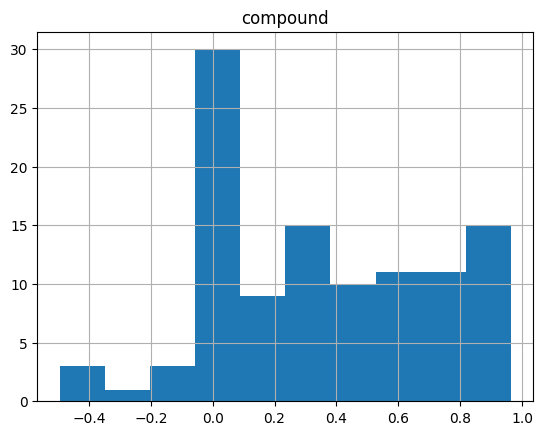

In [381]:
df.hist(['compound'])

In [359]:
newdf[['cli_name','Text','preprocessed_Text','score','compound','Sentiment']]

,cli_name,Text,preprocessed_Text,score,compound,Sentiment
32,School Operators Ltd,Please appreciate that the TCC has expired e E...,appreciate tcc expire,"{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'comp...",0.4019,Satisfied
33,School Operators Ltd,Dear Henry Exactly where are we on this We got...,exactly get load new work permit apply number,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.0772,Neutral
34,School Operators Ltd,Please appreciate we have been at it for 3 yea...,appreciate year,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,Satisfied
35,School Operators Ltd,Dear Henry We spoke about this issue a few wee...,speak issue week ago kindly update shortly nee...,"{'neg': 0.154, 'neu': 0.641, 'pos': 0.205, 'co...",0.0516,Neutral
36,School Operators Ltd,Dear Clifford Long time You recall we met in m...,long time recall meet office early year notice...,"{'neg': 0.059, 'neu': 0.829, 'pos': 0.112, 'co...",0.2732,Satisfied
...,...,...,...,...,...,...
99,School Operators Ltd,No don t agree Just Call tomorrow to discuss E...,don t agree tomorrow discuss,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.3612,Satisfied
100,School Operators Ltd,Ernest,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,Neutral
101,School Operators Ltd,Dear Charlotte My apologies for this belated r...,apology belate response accounts ok retain ear...,"{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'comp...",0.8750,Very Satisfied
102,School Operators Ltd,MW Can you resolve this without fail I don t w...,mw resolve fail don t want reminder,"{'neg': 0.307, 'neu': 0.351, 'pos': 0.342, 'co...",-0.1531,Neutral


In [40]:
newdf.reset_index(inplace=True)

In [44]:
newdf['preprocessed_Text'][3]

'speak issue week ago kindly update shortly need renew sol tcc shortly know emotional rage go year let revisit rgds bursar disclaimer information contain mail thereto privileged confidential intend recipient review dissemination use transmission content strictly prohibit kindly notify sender promptly return delete message immediately institution sender accept liability whatsoever loss damage incur suffer result arise use'

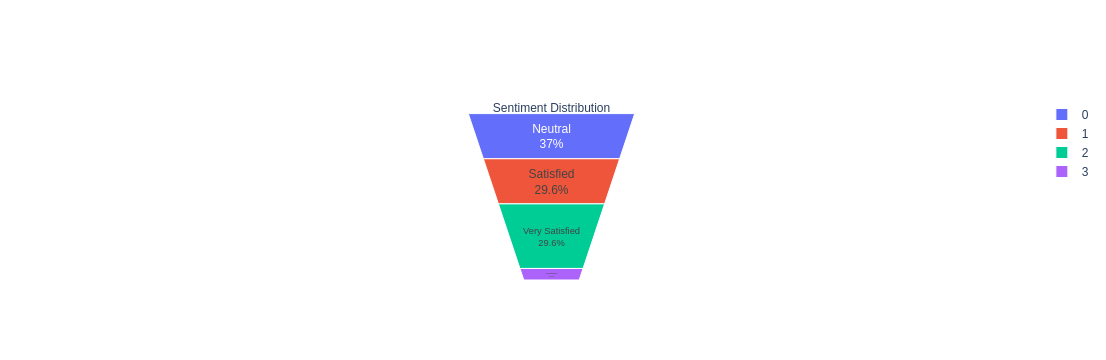

In [382]:
from plotly import graph_objs as go
var1 = df.groupby('Sentiment').count()['preprocessed_Text'].reset_index().sort_values(by='preprocessed_Text',ascending=False)
fig = go.Figure(go.Funnelarea(
    text =var1.Sentiment,
    values = var1.preprocessed_Text,
    title = {"position": "top center", "text": "Sentiment Distribution"}
    ))
fig.show()

In [159]:
from textblob import TextBlob, Word, Blobber
email = "I would like to meet you again"
TextBlob(email).sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [57]:
df['TB_score']= df.preprocessed_Text.apply(lambda x: TextBlob(x).sentiment)
df.head()

,cli_name,Subject,From,To,Text,preprocessed_Text,description_lengths,score,compound,Sentiment,TB_score
0,Giza Systems,RE Company Form 20 Adding Richard and Ehab Th...,Ahmed Hany,Salim salim,Adding Richard and Ehab Thanks Best Regards A...,add richard ehab thank best ahmed hany elsayed...,40,"{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...",0.7717,very satisfied,"(1.0, 0.3)"
1,Giza Systems,RE Rejection of TCC,Ahmed Hany,Nanyonjo Jacinta,Dear Rita Kindly find attached Thanks Best Re...,dear rita kindly find attach thank best ahmed ...,42,"{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...",0.9100,very satisfied,"(0.8, 0.6)"
2,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Peter peter,Dear Mwangi This is fine with us Regards On T...,dear mwangi fine tue apr peter mwangi peter mw...,190,"{'neg': 0.06, 'neu': 0.784, 'pos': 0.156, 'com...",0.9584,very satisfied,"(0.06439909297052154, 0.3692176870748301)"
3,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Phoebe kra,From Carolyn Njange cnjange imlu org mailto c...,carolyn njange cnjange cnjange send tuesday ap...,599,"{'neg': 0.007, 'neu': 0.837, 'pos': 0.156, 'co...",0.9981,very satisfied,"(0.2283819628647215, 0.44462864721485407)"
4,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Phoebe kra,Dear Mwangi We spoke when Phoebe requested th...,dear mwangi speak phoebe request additional in...,493,"{'neg': 0.008, 'neu': 0.818, 'pos': 0.174, 'co...",0.9978,very satisfied,"(0.2534516765285996, 0.47061143984220905)"


In [59]:
df['TB_sentiment'] = df['preprocessed_Text'].apply(lambda x: TextBlob(x).sentiment[0])
df.head()

,cli_name,Subject,From,To,Text,preprocessed_Text,description_lengths,score,compound,Sentiment,TB_score,TB_sentiment
0,Giza Systems,RE Company Form 20 Adding Richard and Ehab Th...,Ahmed Hany,Salim salim,Adding Richard and Ehab Thanks Best Regards A...,add richard ehab thank best ahmed hany elsayed...,40,"{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...",0.7717,very satisfied,"(1.0, 0.3)",1.000000
1,Giza Systems,RE Rejection of TCC,Ahmed Hany,Nanyonjo Jacinta,Dear Rita Kindly find attached Thanks Best Re...,dear rita kindly find attach thank best ahmed ...,42,"{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...",0.9100,very satisfied,"(0.8, 0.6)",0.800000
2,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Peter peter,Dear Mwangi This is fine with us Regards On T...,dear mwangi fine tue apr peter mwangi peter mw...,190,"{'neg': 0.06, 'neu': 0.784, 'pos': 0.156, 'com...",0.9584,very satisfied,"(0.06439909297052154, 0.3692176870748301)",0.064399
3,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Phoebe kra,From Carolyn Njange cnjange imlu org mailto c...,carolyn njange cnjange cnjange send tuesday ap...,599,"{'neg': 0.007, 'neu': 0.837, 'pos': 0.156, 'co...",0.9981,very satisfied,"(0.2283819628647215, 0.44462864721485407)",0.228382
4,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Phoebe kra,Dear Mwangi We spoke when Phoebe requested th...,dear mwangi speak phoebe request additional in...,493,"{'neg': 0.008, 'neu': 0.818, 'pos': 0.174, 'co...",0.9978,very satisfied,"(0.2534516765285996, 0.47061143984220905)",0.253452


In [68]:
new_df = df[['cli_name','score','compound']]

In [69]:
new_df.to_json('client_score.json')

In [367]:
df[df['cli_name']=='School Operators Ltd']['preprocessed_Text']

32                                 appreciate tcc expire
33         exactly get load new work permit apply number
34                                       appreciate year
35     speak issue week ago kindly update shortly nee...
36     long time recall meet office early year notice...
                             ...                        
99                          don t agree tomorrow discuss
100                                                     
101    apology belate response accounts ok retain ear...
102                     resolve fail don t want reminder
103                                sort irritate balance
Name: preprocessed_Text, Length: 71, dtype: object

In [ ]:
c

## Complain Categorization using Keywords Provided

In [22]:
billing_dispute_keywords = [
    "Discrepancy",
    "Charges",
    "Additional charges",
    "Clarification",
    "Billing dispute",
    "Discrepancies",
    "Audit fee increase",
    "Reconsideration",
    "Disputed charges"
]


quality_of_service_complaint_keywords = [
    "Dissatisfaction",
    "Issues",
    "Communication",
    "Accuracy",
    "Thoroughness",
    "Feedback",
    "Improvements",
    "Quality",
    "Effectiveness",
    "Compliance",
    "Regulatory standards",
    "Discrepancies",
    "Clarification",
    "Cooperation",
    "Integrity",
    "Ethical standards",
    "Disciplinary action"
]

conflict_of_interest_keywords = [
    "Conflict of interest",
    "Disclosure",
    "Due diligence",
    "Potential conflicts",
    "Transparency",
    "Trust",
    "Impartiality",
    "Cooperation",
    "Bias",
    "Independence concerns",
    "Credibility",
    "Integrity",
    "Compliance",
    "Regulatory requirements",
    "Auditor-client relationship",
    "Complaints",
    "Concerns"

]

communication_issue_keywords = [
    "Communication",
    "Updates",
    "Clarification",
    "Anxiety",
    "Uncertainty",
    "Guidance",
    "Timely",
    "Accurate",
    "Inquiry",
    "Response",
    "Consultation",
    "Expertise",
    "Strategic guidance",
    "Attention",
    "Transparency",
    "Regular updates",
    "Communication breakdown",
    "Deadlines",
    "Intervention"
]

confidentiality_breach_keywords = [
    "Confidentiality",
    "Breach",
    "Advisory information",
    "Investigation",
    "Implications",
    "Competitive advantage",
    "Prevention",
    "Data security breach",
    "Notification",
    "Audit-related information",
    "Compromised",
    "Unauthorized access",
    "Assessment",
    "Mitigation",
    "Document handling",
    "Concerns",
    "Mishandled",
    "Safeguards"
]



In [23]:
test_df = df[['preprocessed_Text','Text']]

In [24]:
test_df

,preprocessed_Text,Text
0,add thank best elsayed country sales manager u...,Adding Richard and Ehab Thanks Best Regards A...
1,kindly find attach thank best elsayed country ...,Dear Rita Kindly find attached Thanks Best Re...
2,fine tue apr write good evening thank reach pr...,Dear Mwangi This is fine with us Regards On T...
3,send tuesday april ochiel ke ochiel ke ochiel ...,From Carolyn Njange cnjange imlu org mailto c...
4,speak request additional information promise r...,Dear Mwangi We spoke when Phoebe requested th...
...,...,...
91,originate outside organization click link open...,This email originated from outside of the org...
92,originate outside organization click link open...,This email originated from outside of the org...
93,originate outside organization click link open...,This email originated from outside of the org...
94,originate outside organization click link open...,This email originated from outside of the org...


In [99]:
test_df = pd.DataFrame(test_df)

In [25]:
def count_matched_keywords(text,keywords_class):
    words = text.split()
    count = 0
    for word in words:
        if word in keywords_class:
            count+=1
        else:
            continue
    return count


In [26]:
test_df['billing_dispute_keyword'] = test_df['Text'].apply(lambda x: count_matched_keywords(x,billing_dispute_keywords))
test_df['quality_of_service_complaint_keywords'] = test_df['Text'].apply(lambda x: count_matched_keywords(x,quality_of_service_complaint_keywords))
test_df['conflict_of_interest_keywords'] = test_df['Text'].apply(lambda x: count_matched_keywords(x,conflict_of_interest_keywords))
test_df['communication_issue_keywords'] = test_df['Text'].apply(lambda x: count_matched_keywords(x,communication_issue_keywords))
test_df['confidentiality_breach_keywords'] = test_df['Text'].apply(lambda x: count_matched_keywords(x,confidentiality_breach_keywords))

In [27]:
def assign_category(item,keywords):
    if item!=0:
        return keywords[:-9]
    else:
        return 'No Complain'
    

In [28]:
test_df['complain_cat'] = test_df['conflict_of_interest_keywords'].apply(lambda x:assign_category(x,'conflict_of_interest_keywords'))

In [135]:
st = 'quality_of_service_complaint_keywords'

In [29]:
test_df['complain_cat'][6:8] = 'conflict of interest | quality of service complaint'

In [156]:
complain_cat_df = test_df['complain_cat'].value_counts()

In [163]:
complain_cat_df = pd.DataFrame(complain_cat_df)

In [161]:
test_df.to_json('complain_categories.json')

In [164]:
complain_cat_df.to_json('complain.json')

In [49]:
def preprocessed_emails(text):
    doc = nlp(text)
    
    # Identify named entities
    named_entities = set(ent.text for ent in doc.ents if ent.label_ == 'PERSON')
    
    processed_text = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_digit and not token.is_bracket and not token.is_currency and not token.is_space:
            # Check if the token is a named entity
            if token.text not in named_entities:
                processed_text.append(token.lemma_.lower())
    
    filtered = ' '.join(processed_text)
    words = filtered.split()
    preprocessed_text = [word for word in words if word not in ['http', 'https', 'www', 'com', 'org', 'mailto', 'regards', 'Regards', 'Rgds', 'imlu', 'email', 'attachment', 'ea', 'e', 'bdo', 'kariuki', '7C', 'cnjange', 'peter']]
    
    return ' '.join(preprocessed_text)

# Example usage
text = "Hello , please find the attached document. Regards, Kariuki"
print(preprocessed_emails(text))

hello sunny find attach document regard


In [58]:
import spacy

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def preprocessed_emails(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Collect named entities labeled as 'PERSON'
    named_entities = {ent.text for ent in doc.ents if ent.label_ == 'PERSON'}
    
    processed_tokens = []
    for token in doc:
        if (
            not token.is_stop and
            not token.is_punct and
            not token.is_digit and
            not token.is_bracket and
            not token.is_currency and
            not token.is_space and
            token.text not in named_entities
        ):
            processed_tokens.append(token.lemma_.lower())
    
    filtered = ' '.join(processed_tokens)
    words = filtered.split()
    preprocessed_text = [word for word in words if word not in [
        'http', 'https', 'www', 'com', 'org', 'mailto', 'regards', 'rgds',
        'imlu', 'email', 'attachment', 'ea', 'e', 'bdo', '7c', 'cnjange'
    ]]
    
    return ' '.join(preprocessed_text)

# Example usage
text = "hello , please find the attached document. regards, kariuki"
print(preprocessed_emails(text))


hello ahmed hany find attach document regard kariuki


In [31]:
bardf = pd.read_json('complain.json')

<Axes: >

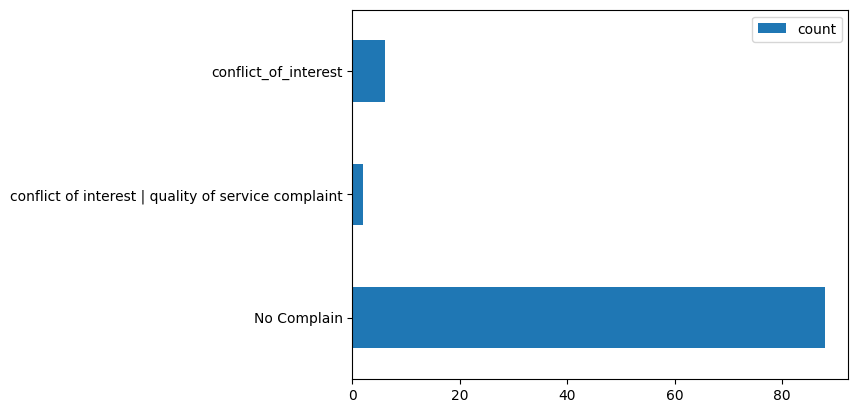

In [32]:
bardf.plot(kind='barh')

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("preprocessing_complet.csv")

In [3]:
df

,Unnamed: 0,cli_name,Subject,From,To,Text,preprocessed_Text,description_lengths
0,0,Giza Systems,RE Company Form 20 Adding Richard and Ehab Th...,Ahmed Hany,Salim salim,Adding Richard and Ehab Thanks Best Regards A...,add thank best elsayed country sales manager u...,32
1,1,Giza Systems,RE Rejection of TCC,Ahmed Hany,Nanyonjo Jacinta,Dear Rita Kindly find attached Thanks Best Re...,kindly find attach thank best elsayed country ...,34
2,2,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Peter peter,Dear Mwangi This is fine with us Regards On T...,fine tue apr write good evening thank reach pr...,157
3,3,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Phoebe kra,From Carolyn Njange cnjange imlu org mailto c...,send tuesday april ochiel ke ochiel ke ochiel ...,443
4,4,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Phoebe kra,Dear Mwangi We spoke when Phoebe requested th...,speak request additional information promise r...,378
...,...,...,...,...,...,...,...,...
91,91,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,This email originated from outside of the org...,originate outside organization click link open...,51
92,92,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,This email originated from outside of the org...,originate outside organization click link open...,85
93,93,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,This email originated from outside of the org...,originate outside organization click link open...,84
94,94,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,This email originated from outside of the org...,originate outside organization click link open...,83


In [13]:
df[df['cli_name']=='INDEPENDENT MEDICO LEGAL UNIT (IMLU)']['Text']

2      Dear Mwangi This is fine with us Regards On T...
3      From Carolyn Njange cnjange imlu org mailto c...
4      Dear Mwangi We spoke when Phoebe requested th...
5      Dear Kariuki Thank you for that clarification...
6      From Carolyn Njange cnjange imlu org mailto c...
7      Dear BDO Team See list of requirements from K...
8      Dear Peter Find attached the filled tax payer...
9      Dear Mwangi Kindly revert to us as promised e...
10     From Carolyn Njange cnjange imlu org mailto c...
11     Dear Mwangi Find attached the TCC for our Boa...
12     From Carolyn Njange cnjange imlu org mailto c...
13     Dear Mwangi We spoke Find attached pending re...
14     Dear Mwangi and Kariuki Find attached the GL ...
15     Dear Mwangi Find attached the compliance cert...
16     Dear Peter Find attached the filled tax payer...
17     Well noted will share the link On Tue 6 Jun 2...
18     From Carolyn Njange cnjange imlu org mailto c...
Name: Text, dtype: object

In [45]:
df

,cli_name,Subject,From,To,Text,preprocessed_Text,description_lengths,score,compound,Sentiment
0,Giza Systems,RE Company Form 20 Adding Richard and Ehab Th...,Ahmed Hany,Salim salim,Adding Richard and Ehab Thanks Best Regards A...,add thank best elsayed country sales manager u...,32,"{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...",0.7717,Very Satisfied
1,Giza Systems,RE Rejection of TCC,Ahmed Hany,Nanyonjo Jacinta,Dear Rita Kindly find attached Thanks Best Re...,kindly find attach thank best elsayed country ...,34,"{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...",0.8720,Very Satisfied
2,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Peter peter,Dear Mwangi This is fine with us Regards On T...,fine tue apr write good evening thank reach pr...,157,"{'neg': 0.071, 'neu': 0.77, 'pos': 0.159, 'com...",0.9300,Very Satisfied
3,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Phoebe kra,From Carolyn Njange cnjange imlu org mailto c...,send tuesday april ochiel ke ochiel ke ochiel ...,443,"{'neg': 0.009, 'neu': 0.792, 'pos': 0.2, 'comp...",0.9980,Very Satisfied
4,INDEPENDENT MEDICO LEGAL UNIT (IMLU),Re Application for Income Tax Exemption Certi...,Carolyn Njange,Phoebe kra,Dear Mwangi We spoke when Phoebe requested th...,speak request additional information promise r...,378,"{'neg': 0.01, 'neu': 0.775, 'pos': 0.215, 'com...",0.9977,Very Satisfied
...,...,...,...,...,...,...,...,...,...,...
91,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,This email originated from outside of the org...,originate outside organization click link open...,51,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.8860,Very Satisfied
92,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,This email originated from outside of the org...,originate outside organization click link open...,82,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.8860,Very Satisfied
93,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,This email originated from outside of the org...,originate outside organization click link open...,81,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.8860,Very Satisfied
94,Snetor East Africa Limited,Fw REQUEST FOR INFORMATION,Shiraz Rehmanji,REHMANJI s,This email originated from outside of the org...,originate outside organization click link open...,80,"{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compou...",0.8860,Very Satisfied
